<a href="https://colab.research.google.com/github/DuillesAD/Challenge-Telecon-X-analise-de-dados/blob/main/Challenge_Telecon_X_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Bibliotecas que podem ser usadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import json

In [41]:
# Abertura do arquivo
with open("/content/TelecomX_Data.json") as f:
    dados_telecon = json.load(f)

In [42]:
# Normalização dos dados
df = pd.json_normalize(dados_telecon, sep=".")
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [43]:
# Visualização dos tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [44]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
# Contar valores nulos ou em branco por coluna
valores_nulos_ou_vazios = df.apply(lambda x: x.isnull() | (x.astype(str).str.strip() == '')).sum()

# Exibir colunas com pelo menos 1 valor inválido
print("\nValores nulos, em branco ou strings vazias por coluna:")
print(valores_nulos_ou_vazios[valores_nulos_ou_vazios > 0])



Valores nulos, em branco ou strings vazias por coluna:
Churn                    224
account.Charges.Total     11
dtype: int64


In [47]:
# Remover linhas duplicadas
df = df.drop_duplicates()

In [48]:
# Eliminando as colunas de Churn

df = df[df['Churn'].str.strip() != '']
print("Número de linhas vazias 'Churn':", len(df))

Número de linhas vazias 'Churn': 7043


In [49]:
# identificar e substituir strings vazias por NaN
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

# Remover a linha se todas colunas estiverem com vazias
df.dropna(how="all", inplace=True)

In [50]:
# Padronizar textos (remover espaços e colocar em minúsculo) em colunas de texto
coluna_texto = df.select_dtypes(include=['object', 'category']).columns
for col in coluna_texto:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [51]:
# Verificar novamente os nulos após limpeza de strings
print("Valores nulos após limpeza:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Valores nulos após limpeza:
Series([], dtype: int64)


In [52]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.3
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.4
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.4


In [53]:
colunas_nomes = {
    "customerID": "ID cliente",
    "Churn": "evasao",
    "customer.gender": "gênero",
    "customer.SeniorCitizen": ">=65",
    "customer.Partner": "p parceiro",
    "customer.Dependents": "dependentes",
    "customer.tenure": "t contrato",
    "phone.PhoneService": "serviço telef",
    "phone.MultipleLines": "> 1 telef",
    "internet.InternetService": "internet",
    "internet.OnlineSecurity": "segurança",
    "internet.OnlineBackup": "backup",
    "internet.DeviceProtection": "proteção",
    "internet.TechSupport": "suporte",
    "internet.StreamingTV": "streaming TV",
    "internet.StreamingMovies": "streaming filmes",
    "account.Contract": "tipo/contrato",
    "account.PaperlessBilling": "fatura online",
    "account.PaymentMethod": "forma/pagamento",
    "account.Charges.Monthly": "gasto/mensal",
    "account.Charges.Total": "gasto total"
}

In [54]:
# renomeando colunas
df = df.rename(columns=colunas_nomes)

In [55]:
# Verificar se a coluna e binária e transformar em 0  1
colunas_binarias = [
    col for col in df.columns
    if set(df[col].dropna().unique()).issubset({"yes", "no"})
]

# Aplicando concerção nas colunas artreadas
for col in colunas_binarias:
    df[col] = df[col].map({"yes": 1, "no": 0})

In [67]:
df.head()

,ID cliente,evasao,gênero,>=65,p parceiro,dependentes,t contrato,serviço telef,> 1 telef,internet,...,proteção,suporte,streaming TV,streaming filmes,tipo/contrato,fatura online,forma/pagamento,contas_diarias,gasto/mensal,gasto total
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,2.20,65.6,593.30
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,2.01,59.9,542.40
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,2.34,73.9,280.85
3,0011-igkff,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,3.17,98.0,1237.85
4,0013-exchz,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,2.97,83.9,267.40


In [57]:
# alterando a coluna gasto total para float
df["gasto total"] = df["gasto total"].str.replace(",", "").astype(float)

In [58]:
# Convertento todas as colunas com "yes"/"no" para 1/0
df = df.replace({"yes": 1, "no": 0})

In [59]:
df = df.drop("contas_diarias", errors="ignore")

In [60]:
# calculo dos gastos diários
df["contas_diarias"] = ((df["gasto total"]/ df["t contrato"])/30).round(2)

# Inserindo a coluna na posição 19
df.insert(19, "contas_diarias", df.pop("contas_diarias"))

# Análise Descritiva

/tmp/ipython-input-84-3545719131.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultado_media, x="Média", y="Variável", palette="viridis")


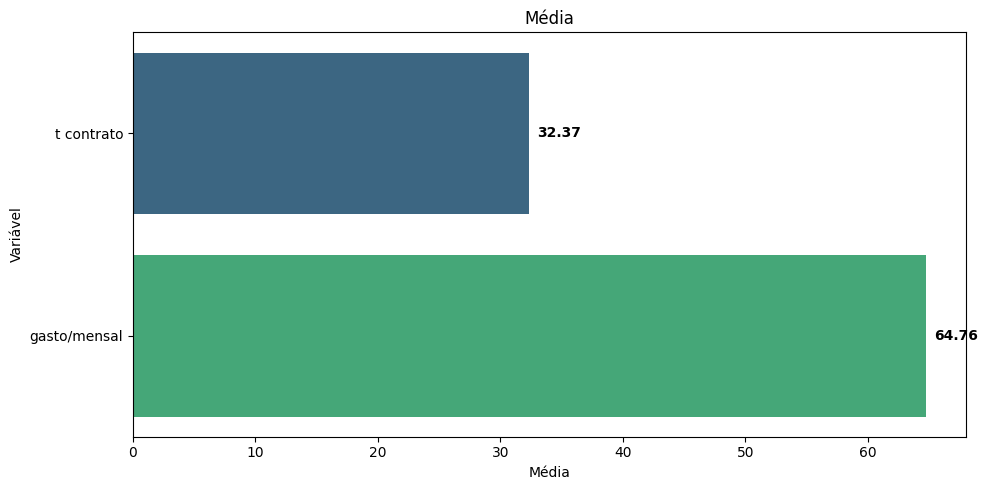

In [84]:
# Criando análise de média com algumas colunas
df_media_cout = ["t contrato", "gasto/mensal"]

media = df[df_media_cout].mean().round(2)

# Criando dataframe com resultados
df_resultado_media = pd.DataFrame({
    "Variável": media.index,
    "Média": media.values,

})


# Plotando gráfico horizontal
plt.figure(figsize=(10, 5))
sns.barplot(data=df_resultado_media, x="Média", y="Variável", palette="viridis")

# Adiciona os valores no final das barras
for index, row in df_resultado_media.iterrows():
    plt.text(row["Média"] + max(df_resultado_media["Média"])*0.01, index, f'{row["Média"]:.2f}',
             va='center', fontsize=10, fontweight='bold')

plt.title("Média")
plt.xlabel("Média")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

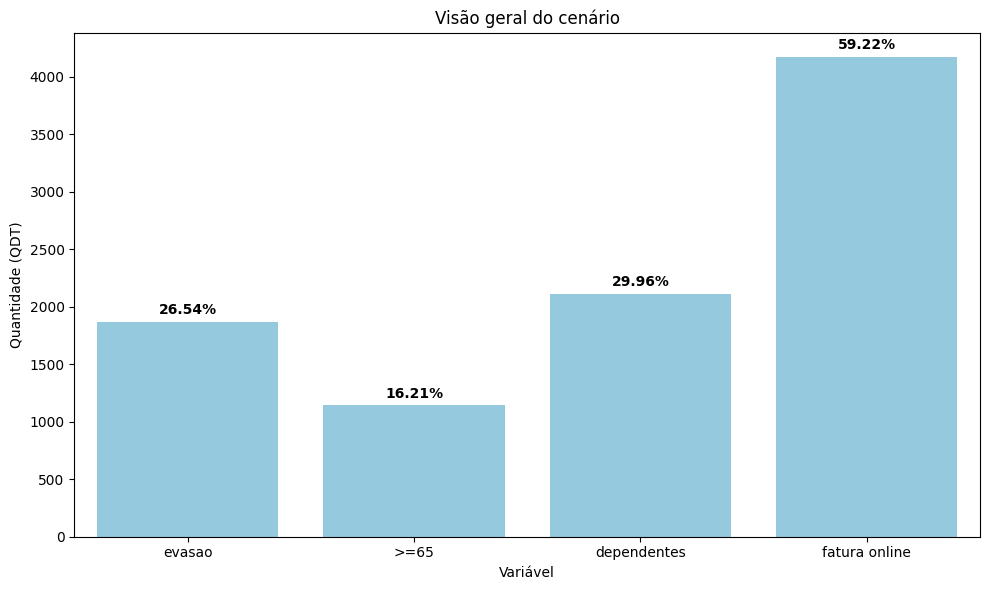

In [80]:
df_contagem_percentual = ["evasao", ">=65", "dependentes", "fatura online"]

contagem = df[df_contagem_percentual].sum()
percental = df[df_contagem_percentual].mean()*100

df_resultado_percetual = pd.DataFrame({
    "Variável": contagem.index,
    "QDT": contagem.astype(int),
    "Percentual": percental.round(2)
})


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultado_percetual, x="Variável", y="QDT", color="skyblue")

# Adiciona rótulos com o percentual em cima de cada barra
for i, row in df_resultado_percetual.iterrows():
    plt.text(i, row["QDT"] + max(df_resultado_percetual["QDT"])*0.01, f'{row["Percentual"]:.2f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Visão geral do cenário")
plt.ylabel("Quantidade (QDT)")
plt.xlabel("Variável")
plt.tight_layout()
plt.show()

# Contagem de Evasão por Variáveis Categóricas